In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.spatial import ConvexHull

In [2]:
path = "/content/drive/MyDrive/NSSTC/Fires/Fires Dataset/2021_04_forestfires.csv"

data = pd.read_csv(path)
data.head(5)

,LATITUDE,LONGITUDE,FRP
0,11.660436,98.765945,3.54
1,11.657220,98.767342,4.13
2,11.590357,98.840027,3.29
3,11.916737,98.813362,0.76
4,11.453232,98.809380,0.93


In [3]:
scaler = MinMaxScaler()
scaler.fit(data)
dfs1 = scaler.transform(data)
dfs1 = pd.DataFrame(dfs1)

In [4]:
print(dfs1.shape)
print('------------------------------------------------')
print(dfs1.isnull().sum())
print('------------------------------------------------')
print(dfs1.describe())

(52035, 3)
------------------------------------------------
0    0
1    0
2    0
dtype: int64
------------------------------------------------
                  0             1             2
count  52035.000000  52035.000000  52035.000000
mean       0.664080      0.430874      0.020604
std        0.158835      0.226570      0.043709
min        0.000000      0.000000      0.000000
25%        0.595282      0.219249      0.003328
50%        0.681155      0.465889      0.006986
75%        0.777478      0.598007      0.017160
max        1.000000      1.000000      1.000000


In [ ]:
SSE = []

for k in range(3,16):

    kmeans = KMeans(n_clusters = k) # k-means clustering algorithm where we are iterating through k
    kmeans.fit(dfs1) # Fitting k-means clustering algorithm
    SSE.append(kmeans.inertia_) # Appending the SSE to the empty list.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
results = pd.DataFrame({"k": range(3,16),
                       "SSE/Inertia": SSE})
results

,k,SSE/Inertia
0,3,1210.831909
1,4,849.202664
2,5,674.093358
3,6,549.047215
4,7,451.189615
5,8,402.309173
6,9,364.199878
7,10,328.972598
8,11,296.765423
9,12,267.076976


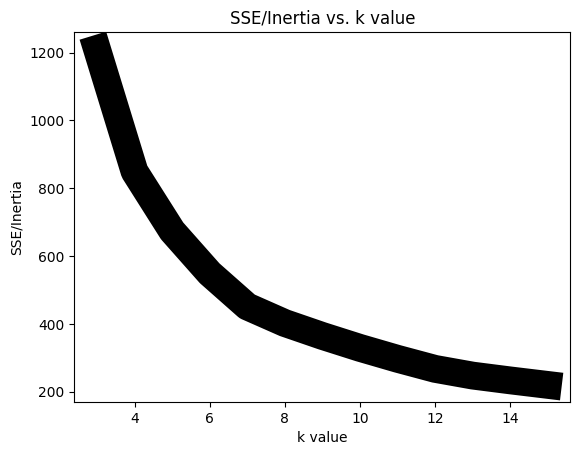

In [ ]:
plt.plot(results["k"], results["SSE/Inertia"], linewidth = 20, color = "black")
plt.xlabel("k value") # x axis label
plt.ylabel("SSE/Inertia") # y axis label
plt.title("SSE/Inertia vs. k value"); # title

In [5]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(dfs1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [6]:
data['kmeans_clusters'] = kmeans.labels_
data

,LATITUDE,LONGITUDE,FRP,kmeans_clusters
0,11.660436,98.765945,3.54,5
1,11.657220,98.767342,4.13,5
2,11.590357,98.840027,3.29,5
3,11.916737,98.813362,0.76,5
4,11.453232,98.809380,0.93,5
...,...,...,...,...
52030,27.442308,97.540245,5.82,4
52031,27.347334,97.230576,4.61,4
52032,27.339334,97.660965,10.29,4
52033,27.338827,97.656265,10.29,4


In [7]:
#silhouette
from sklearn.metrics import silhouette_score

score=silhouette_score(dfs1,kmeans.labels_)
score

0.4692024112945842

In [ ]:
data.groupby("kmeans_clusters").describe()

LATITUDE                                             \
                   count       mean       std        min        25%   
kmeans_clusters                                                       
0                15364.0  21.551903  1.194144  17.905334  20.953183   
1                13653.0  24.776080  1.177599  21.508102  23.941402   
2                 6427.0  18.401873  0.980122  15.981534  17.663158   
3                 6285.0  24.331776  0.846024  22.050035  23.737957   
4                 8542.0  21.829298  0.885387  19.607470  21.155631   
5                 1764.0  13.453550  2.054909  10.241026  11.613291   

                                                 LONGITUDE             ...  \
                       50%        75%        max     count       mean  ...   
kmeans_clusters                                                        ...   
0                21.726166  22.463648  24.052019   15364.0  93.528148  ...   
1                24.815411  25.524433  28.122213   13653.0  97.024201  ...   
2                18.302071  19.070819  21.649231    6427.0  96.552773  ...   
3                24.328375  24.746603  26.898792    6285.0  95.186193  ...   
4                21.801927  22.450476  24.121283    8542.0  98.798488  ...   
5                12.453280  15.653506  17.023262    1764.0  98.656122  ...   

                                            FRP                              \
                       75%         max    count       mean        std   min   
kmeans_clusters                                                               
0                93.955015   94.977158  15364.0  13.253214  27.761976  0.13   
1                97.392700   98.638565  13653.0  15.867333  36.178483  0.16   
2                97.361763   98.251717   6427.0  22.226782  34.832122  0.23   
3                95.682053   96.229187   6285.0   5.792493  13.014667  0.16   
4                99.035393  101.143265   8542.0  26.008088  48.490080  0.14   
5                99.002493   99.651375   1764.0  15.370811  24.938920  0.09   

                                                 
                    25%    50%      75%     max  
kmeans_clusters                                  
0                1.8600  4.700  11.0200  435.25  
1                2.8000  5.330  11.9500  457.52  
2                4.6900  9.360  24.2650  540.29  
3                1.6800  3.130   5.3400  278.41  
4                4.4325  9.130  24.6025  787.40  
5                4.2175  7.795  16.4150  393.84  

[6 rows x 24 columns]

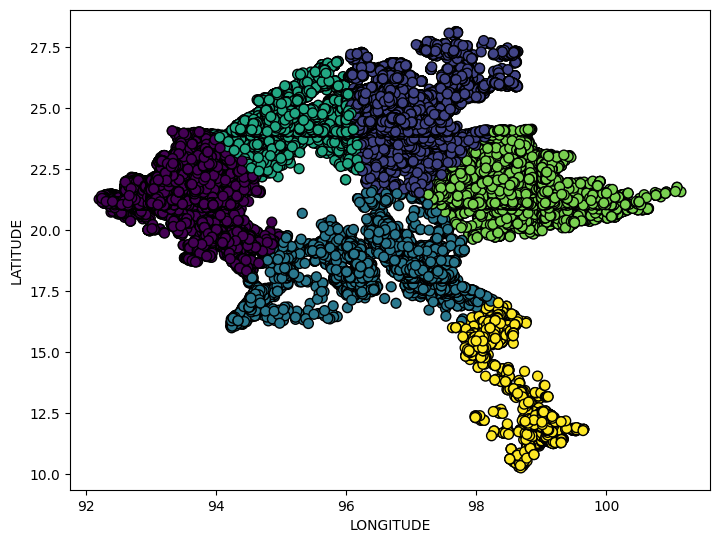

In [ ]:
colors = kmeans.labels_
col_clus = colors

fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(data['LONGITUDE'], data['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)


ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

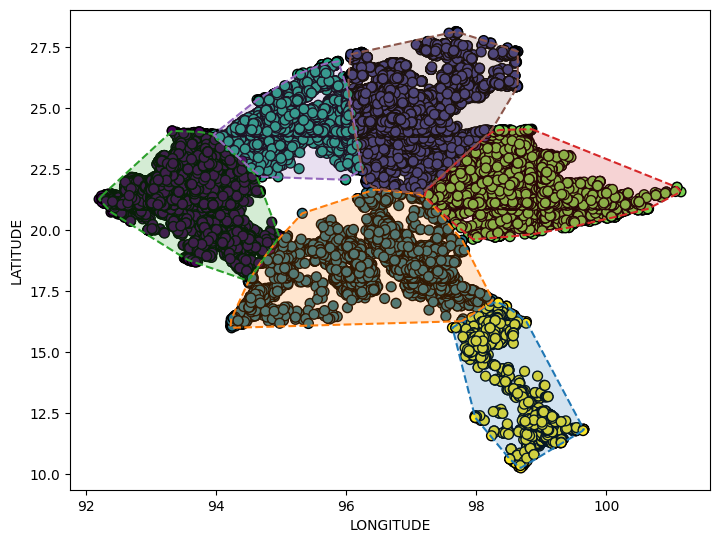

In [ ]:
colors = kmeans.labels_
col_clus = colors

fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(data['LONGITUDE'], data['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)

a =data.kmeans_clusters	.unique()
#s=np.delete(data.kmeans_clusters	.unique(), np.where(a == -1))

for i in a:
    points = data[data.kmeans_clusters == i][['LATITUDE', 'LONGITUDE']].values

    hull = ConvexHull(points)

    vert = np.append(hull.vertices,hull.vertices[0])  # close the polygon by appending the first point at the end

    ax.plot(points[vert, 1], points[vert,0 ], '--')
    ax.fill(points[vert, 1], points[vert, 0], alpha=0.2)

ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

In [ ]:
data.head()

,LATITUDE,LONGITUDE,FRP,kmeans_clusters
0,11.660436,98.765945,3.54,5
1,11.657220,98.767342,4.13,5
2,11.590357,98.840027,3.29,5
3,11.916737,98.813362,0.76,5
4,11.453232,98.809380,0.93,5


In [ ]:
data.to_csv(r'/content/drive/MyDrive/NSSTC/Fires/KMeans Final/KM May FF.ipynb\KM AprilFF.csv', index=False)